<a href="https://colab.research.google.com/github/shivani6565/capstone-project-1/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

SUMMARY: We first decided to take up this project solely due to our mutual interest in travelling different places. we are two members Azhar Metkari and Shivani Chavan working on data analysis of Airbnb 2019 NYC data.We got 1 .csv file. We looked the data and first time making a project was very difficult for us as we are fresher but slowly we generated our interest in given data. Doing random EDA's we built some confidence and started our project.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/MyDrive/capstone project/ Airbnb NYC 2019.csv'

In [ ]:
airbnb_df=pd.read_csv(file_path)

In [ ]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.shape

(48895, 16)

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#REPLACING NaN VALUES WITH 0
airbnb_df.fillna('0',inplace=True)
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0,6,2


In [ ]:
#Remove airbnb_df with 0 for price, calculated_host_listings_count, number_of_reviews, minimum_nights, reviews_per_month, 
airbnb_df = airbnb_df[airbnb_df.price > 0]
airbnb_df = airbnb_df[airbnb_df.calculated_host_listings_count > 0]
airbnb_df = airbnb_df[airbnb_df.number_of_reviews > 0]
airbnb_df = airbnb_df[airbnb_df.minimum_nights > 0]
airbnb_df = airbnb_df[airbnb_df.reviews_per_month > 0]
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.0,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.0,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.0,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.0,1,40


SUMMARY 1:The very first problem i faced in my Airbnb NYC 2019.csv was unwanted columns and null values which are enemy to our data. I cleared all the unwanted columns and filled all null values with zero.

(1)QUESTION: According to given data try to infer the situation where the maximum listings are done on the basis of Room type?

In [ ]:
#Analysing Airbnb based on room type
room_type_distribution=airbnb_df.groupby('room_type')['id'].count()


In [ ]:
room_type_distribution

room_type
Entire home/apt    20331
Private room       17658
Shared room          844
Name: id, dtype: int64

Text(0.5, 0, 'Room Type')

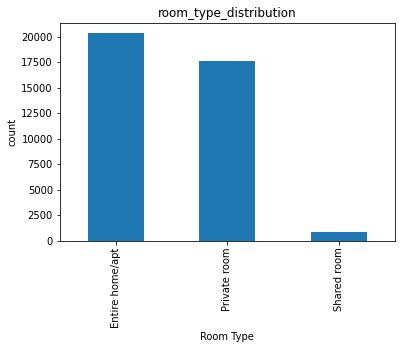

In [ ]:
#ploting bar graph of room type distribution
room_type_distribution.plot(kind='bar')
plt.rcParams['figure.figsize'] = (5, 10)
plt.title('room_type_distribution')
plt.ylabel('count')
plt.xlabel('Room Type')



*INFERANCE:As it can be seen from countplot , most of the listings are entire home/apt with private room being second and shared rooms being least.

2)QUESTION: Is there any noticeable difference of traffic among different areas?Why is that so?

In [ ]:
#Calculating value count of each neighbourhood group
neighbourhood_listing=airbnb_df['neighbourhood_group'].value_counts()
neighbourhood_listing

Manhattan        16632
Brooklyn         16438
Queens            4574
Bronx              875
Staten Island      314
Name: neighbourhood_group, dtype: int64

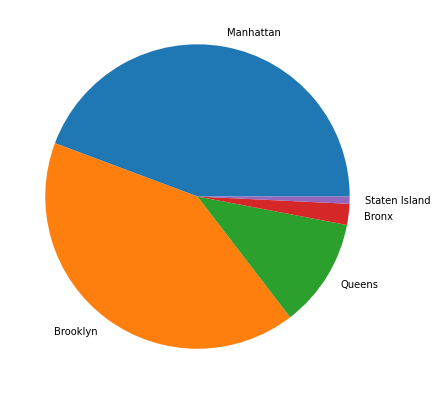

In [ ]:
#Ploting PIE CHART of neighbourhood group
neighbourhood_group=['Manhattan','Brooklyn','Queens','Bronx','Staten Island']
data=[21661,20104,5666,1091,373]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels =neighbourhood_group )
plt.show()


*INFERANCE: From above piechart we can infer that highest Airbnb bookings are in neighbourhood group of Manhattan followed by Broklyn and Queens . And there are least Airbnb in Neighbourhood of staten Island , Bronx . 

SUMMARY 2:Here i wanted to analyse the highest share of booking in different neighbourhood groups. First i prepared the data frame of different neighbourhood with their counts and with help of pie chart i plotted the inference.

*3)QUESTION: ANALYSE EACH ROOM TYPE ACCORDING TO ITS NEIGHBOURHOOD GROUP AND PRICING.

In [ ]:
#calculating mean value of price 
mean_price_df = airbnb_df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean()
mean_price_df

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,120.789644
1,Bronx,Private room,57.202677
2,Bronx,Shared room,56.930233
3,Brooklyn,Entire home/apt,171.270244
4,Brooklyn,Private room,73.394892
5,Brooklyn,Shared room,45.774306
6,Manhattan,Entire home/apt,230.190830
7,Manhattan,Private room,106.603265
8,Manhattan,Shared room,77.980337
9,Queens,Entire home/apt,139.225603


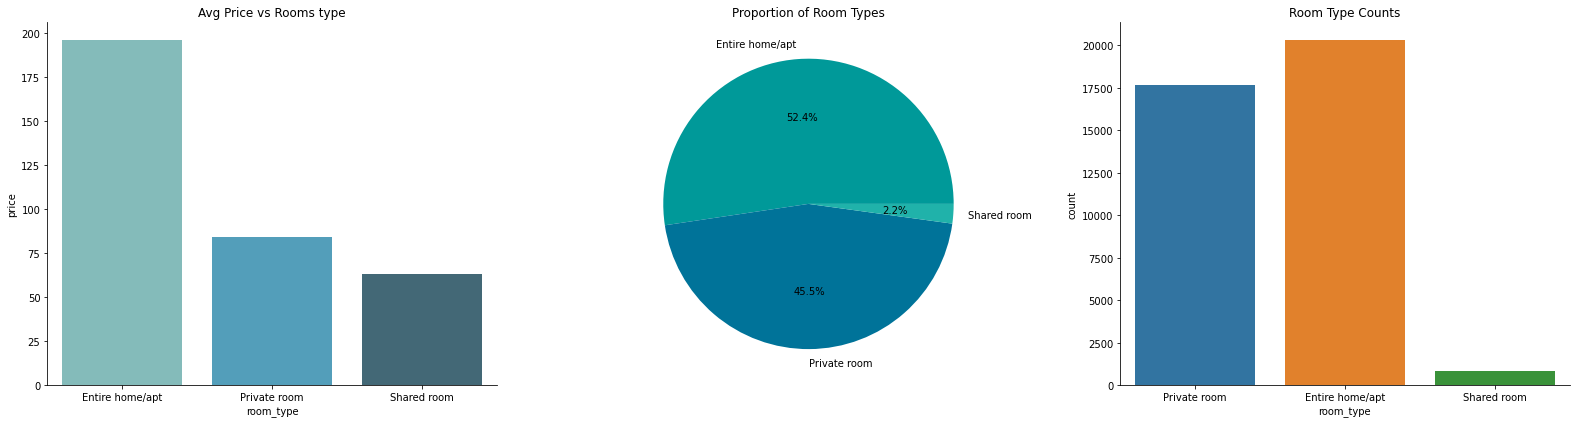

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 6))
ax = axes.flatten()

mean_price_df = airbnb_df.groupby('room_type', as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='room_type', y='price', palette='GnBu_d', ax=ax[0])
ax[0].set_title("Avg Price vs Rooms type");

labels = airbnb_df['room_type'].value_counts().index
sizes = airbnb_df['room_type'].value_counts().values
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#009999','#007399','#20B2AA'])
ax[1].set_title('Proportion of Room Types')

sns.countplot(data=airbnb_df, x='room_type', ax=ax[2])
ax[2].set_title('Room Type Counts')

sns.despine(fig)
plt.tight_layout(h_pad=0.5, w_pad=0.8)

*INFERANCE:Entire home/apt has more than 50% proportion in AIRBNB and it too has highest avg price also. Shared room are the cheapest, but only has 2.4% proportion. life is of high standard.

*4)QUESTION: Find different room types booked for minimum nights in respective neighbourhood.

In [ ]:
mean_price_df = airbnb_df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['minimum_nights']].mean()
mean_price_df 


,neighbourhood_group,room_type,minimum_nights
0,Bronx,Entire home/apt,5.637540
1,Bronx,Private room,3.080306
2,Bronx,Shared room,2.093023
3,Brooklyn,Entire home/apt,5.909715
4,Brooklyn,Private room,4.688619
5,Brooklyn,Shared room,6.062500
6,Manhattan,Entire home/apt,8.613123
7,Manhattan,Private room,4.685053
8,Manhattan,Shared room,3.345506
9,Queens,Entire home/apt,4.369690


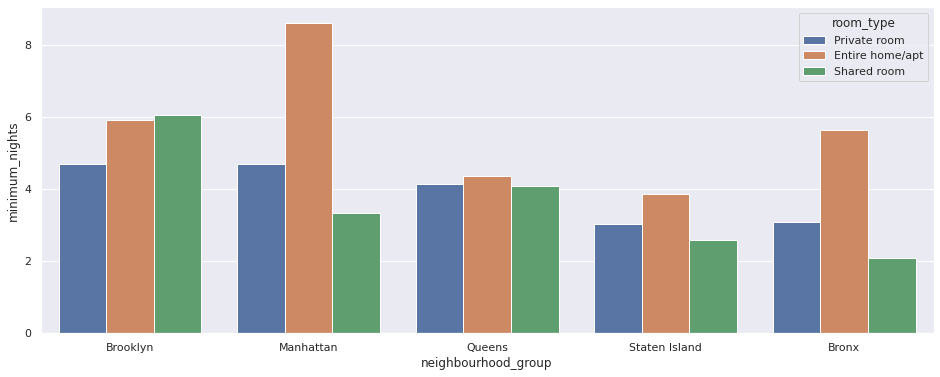

In [ ]:
neighbourhood_group
sns.barplot(x='neighbourhood_group',y='minimum_nights', data=airbnb_df,ci=None, hue='room_type');

*INFERENCE: We can see entire home/apt in manhattan has the more number of bookings for nights followed by brooklyn and bronx. Shared rooms are comparitevely booked less for nights in bronx.



5)QUESTION:Analyse the Airbnb availability within 365 days according to room type and neighbourhood group.

In [ ]:
#calculating mean availability according to neighbourhoodgroup and room type
mean_availability_df = airbnb_df.groupby([ 'neighbourhood_group','room_type'], as_index=False)[['availability_365']].mean()
mean_availability_df

,neighbourhood_group,room_type,availability_365
0,Bronx,Entire home/apt,168.391586
1,Bronx,Private room,173.724665
2,Bronx,Shared room,156.418605
3,Brooklyn,Entire home/apt,102.331496
4,Brooklyn,Private room,107.087142
5,Brooklyn,Shared room,172.072917
6,Manhattan,Entire home/apt,111.026487
7,Manhattan,Private room,104.434776
8,Manhattan,Shared room,148.255618
9,Queens,Entire home/apt,139.386338


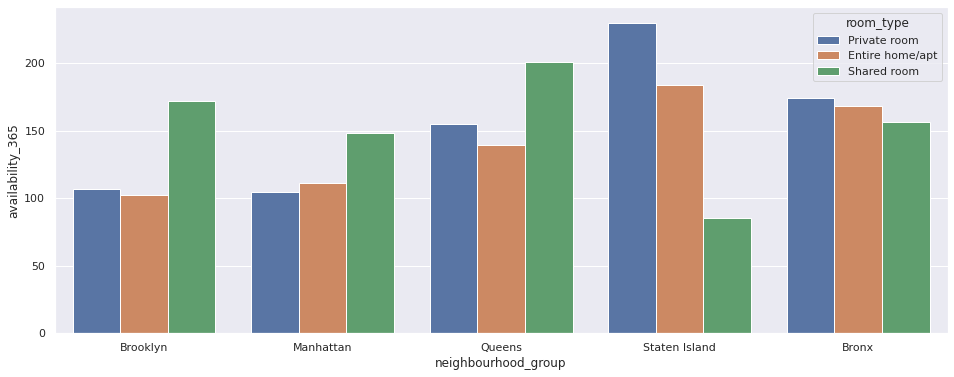

In [ ]:
#Ploting bar grapgh for availability365
sns.barplot(x='neighbourhood_group',y='availability_365', data=airbnb_df,ci=None, hue='room_type');

*INFERENCE: In staten island private room is available most frequently followed by bronx and queens. we can see availability of shared rooms is more than other two rooms . we can infer Manhattan is the most busiest neighbourhood group.



*6)QUESTION: ANALYSE THE MOST REVIEWD AIRBNB AND ITS ROOM TYPE 

In [ ]:
#finding airbnb which are reviewed greter than 500
most_reviewed = airbnb_df[airbnb_df['number_of_reviews'] > 500]
most_reviewed[['name','room_type','number_of_reviews']]

,name,room_type,number_of_reviews
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,Private room,540
2015,Private Bedroom in Manhattan,Private room,594
2030,Beautiful Bedroom in Manhattan,Private room,597
2031,Great Bedroom in Manhattan,Private room,607
10623,Steps away from Laguardia airport,Private room,543
11759,Room near JFK Queen Bed,Private room,629
13495,Room Near JFK Twin Beds,Private room,576
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,Private room,510


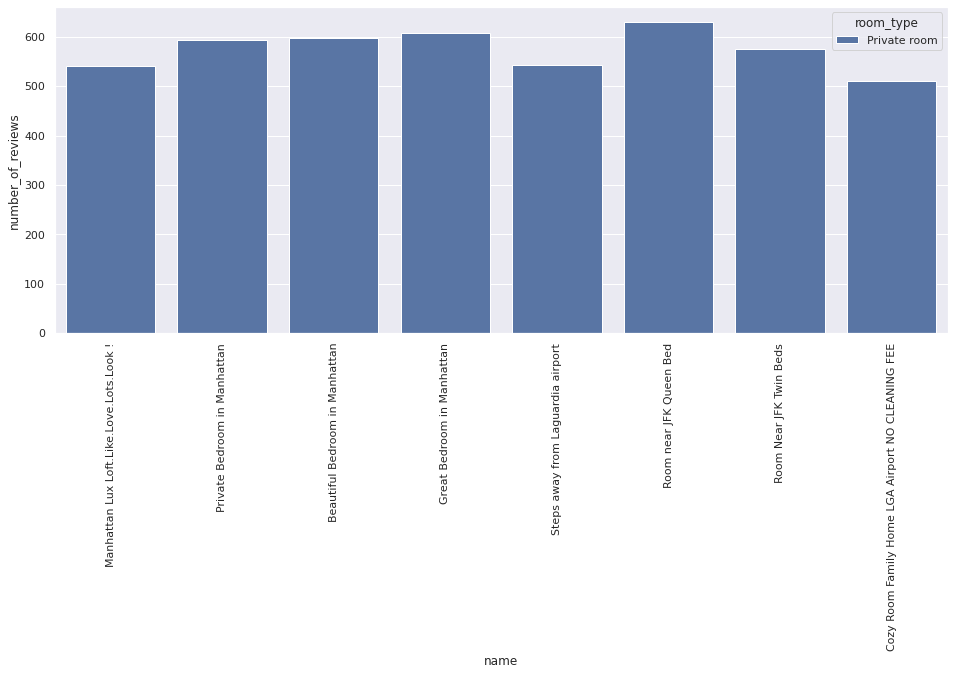

In [ ]:
#plot bar graph airbnb name which are most reviewed
sns.set(rc={'figure.figsize':(16,6)});
graph_plt=sns.barplot(x='name',y='number_of_reviews', data=most_reviewed,ci=None, hue='room_type');
graph_plt.set_xticklabels(graph_plt.get_xticklabels(),rotation=90);


INFERANCE: From above graph we can infer that above eight are Most reviewed Airbnbs and among them and room type of each is private room. 'Room near JFK Queen Bed' is the highest reviewed airbnb followed by 'Great Bedroom in Manhattan' and 'Beautiful Bedroom in Manhattan'.

*7)QUESTION: DISTRIBUTION OF AIRBNB ALONG PRICE AND NO OF REVIEWS

In [ ]:
#extracting mean price and count acording to room type
airbnb_df[['room_type','price']].groupby('room_type').agg(['mean','count']).sort_values(by=('price','mean'), ascending=False).round(2)

price       
                   mean  count
room_type                     
Entire home/apt  196.30  20331
Private room      84.01  17658
Shared room       63.36    844

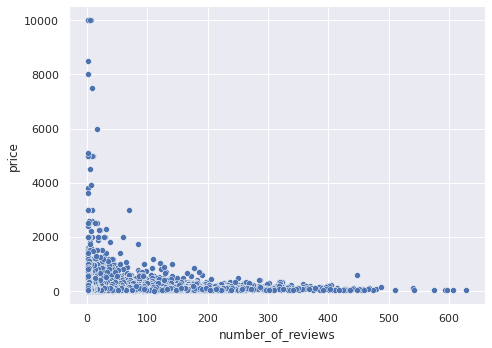

In [ ]:
#ploting scaterred graph 
sns.relplot(x='number_of_reviews', y='price', data=airbnb_df, kind='scatter', aspect=1.4)

*INFERANCE: From above scattered graph we understand that lower price airbnb are most reviewed and higher price airbnb are reviewed by less people . hence we can say that people preger low priced airbnb.

8)QUESTION: ANALYSE AIRBNB PRICE WITH RESPECT TO ITS LONGITUDE AND LATITUDE

In [ ]:
#extrating price related to longitude and latitude
price_long_lat = airbnb_df[['price','longitude','latitude']]
price_long_lat

,price,longitude,latitude
0,149,-73.97237,40.64749
1,225,-73.98377,40.75362
3,89,-73.95976,40.68514
4,80,-73.94399,40.79851
5,200,-73.97500,40.74767
...,...,...,...
48782,129,-73.95366,40.78099
48790,45,-73.81459,40.75104
48799,235,-74.14275,40.54179
48805,100,-73.92400,40.80787


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


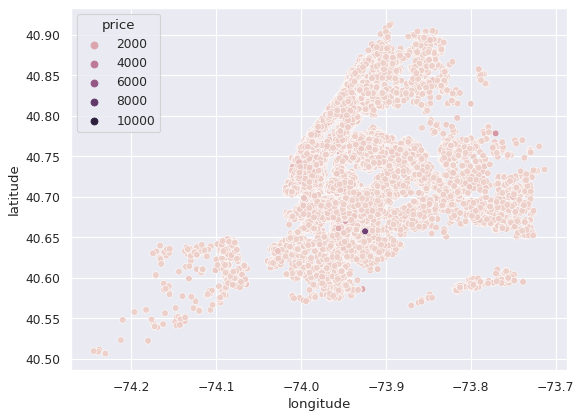

In [ ]:
#ploting scattered graph of price according  to lattitude and longitude
plt.figure(figsize=(8,6), dpi = 80)
sns.scatterplot(price_long_lat.longitude,price_long_lat.latitude,hue=price_long_lat.price);
plt.ioff()

*INFERANCE: It is seen that there are cosliar hotels along latitude of 40.65 and longitude of -73.9.

**Conclusion**

Through this exploratory data analysis and visualization project, we gained several interesting insights into the Airbnb rental market. Below we will summarise the answers to the questions that we framed.

**According to given data try to infer the situation where the maximum listings are done on the basis of Room type?**

As it can be seen from the countplot, most of the listings are entire home/apt with private rooms being second and shared rooms being the least.

 **Is there any noticeable difference of traffic among different areas?Why is that so ?**

The above pie chart shows that the highest share of Airbnb bookings are near Manhattan and brooklyn are more compared to staten island, Bronx, Queens. As Manhataan and Brooklyn are situated in the heart of newyork city it seems to be more traffic at this location.

**ANALYSE EACH ROOM TYPE ACCORDING TO ITS NEIGHBOURHOOD GROUP AND PRICING.**

Entire home/apt has more than 50% proportion in AIRBNB and it too has highest avg price also. Shared room are the cheapest, but only has 2.4% proportion. life is of high standard.

**Find different room types booked for minimum nights in respective neighbourhood.**

We can see entire home/apt in manhattan has the more number of bookings for nights followed by brooklyn and bronx. Shared rooms are comparitevely booked less for nights in bronx.

**Analyse the Airbnb availability within 365 days according to room type and neighbourhood group.**

In staten island private room is available most frequently followed by bronx and queens. we can see availability of shared rooms is more than other two rooms . we can infer Manhattan is the most busiest neighbourhood group.



**DISTRIBUTION OF AIRBNB ALONG PRICE AND NO OF REVIEWS**

From above graph we can infer that above eight are Most reviewed Airbnbs and among them and room type of each is private room. 'Room near JFK Queen Bed' is the highest reviewed airbnb followed by 'Great Bedroom in Manhattan' and 'Beautiful Bedroom in Manhattan'.

**DISTRIBUTION OF AIRBNB ALONG PRICE AND NO OF REVIEWS**

From above scattered graph we understand that lower price airbnb are most reviewed and higher price airbnb are reviewed by less people . hence we can say that people preger low priced airbnb.


**ANALYSE AIRBNB PRICE WITH RESPECT TO ITS LONGITUDE AND LATITUDE**

It is seen that there are cosliar hotels along latitude of 40.65 and longitude of -73.9.

**LIMITATIONS**

We did not have data for specific rooms and different amenities and hence could not compare booking based on different amenities and specific rooms(eg.Bedroom, living rooms, dinning area or swimming pool. Hence, there was an assumption made, particularly in the room type and location section of the report to understand the booking trends.

There was random sampling done while performing the user review analysis due to data limitations. We assume that our random sample is representative of the whole population. Also we assumed room type with all amenities present within.

There were certain features such as price, number of reviews and availability  that either contained missing values and some unwanted columns that was not easy to work on and hence were dropped from our analysis.

